# Assignment 7 (Week 9)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
- Remember to read the `instructions` carefully.
```

## Name: Adenike Akinbade
<br>

## Please show and display ALL your calculations and results.


In [1]:
# Built-in library
import itertools
import re
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
%load_ext lab_black

> Data source is from **Kaggle**. To complete this assignment, you **must create an account** with **Kaggle**.

- The data can be found [here](https://www.kaggle.com/datasets/nenamalikah/nlp-ulta-skincare-reviews).

### Data Dictionary

```
- Review Title: The title of the review.
- Review_Text: The full text of the review.
- Verified_Buyer: Whether the reviewer is a verified buyer of the product.
- Review_Date: The date the review was published relative to the review scrape date.
- Review_Location: The location of the reviewer.
- Review_Upvotes: How many times the review was upvoted by other reviewers.
- Review_Downvotes: How many times the review was downvoted by other reviewers.
- Product: The name of the product the review was issued for.
- Brand: The brand of the product.
- Scrape Date: The date the data was pulled from the web.
```

### Objectives

```
1. Exploratory Data Analysis.

2. Research and experimentation.

3. Sentiments Analysis.

```

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

<br><hr>

###  Qs 1. Explore the data. What can the reviews tell us about the products? Do most buyers have common skincare issues? What issues did the products help solve or exacerbate?


In [2]:
# Load data
df = pd.read_csv("Ulta Skincare Reviews.csv")

# Copy data
skincare_data = df.copy()

# Read data
skincare_data.head(1)

,Review_Title,Review_Text,Verified_Buyer,Review_Date,Review_Location,Review_Upvotes,Review_Downvotes,Product,Brand,Scrape_Date
0,Perfect,Love using this on my face while in the shower. Heats up and gives a light scrub nicely,No,15 days ago,Undisclosed,0,0,Multi-Vitamin Thermafoliant,Dermalogica,3/27/23


In [3]:
# Check null values
print(skincare_data.isna().sum())

# Data size
print(skincare_data.shape)

Review_Title        0
Review_Text         2
Verified_Buyer      0
Review_Date         0
Review_Location     1
Review_Upvotes      0
Review_Downvotes    0
Product             0
Brand               0
Scrape_Date         0
dtype: int64
(4150, 10)


In [4]:
# Drop null values
skincare_data = skincare_data.dropna()

# Verify change
assert df.shape != skincare_data.shape

In [5]:
# Frequency of products
skincare_data.Product.value_counts(normalize=True)

Daily Superfoliant             0.361707
Daily Microfoliant             0.360984
Hydro Masque Exfoliant         0.192911
Multi-Vitamin Thermafoliant    0.084398
Name: Product, dtype: float64

In [6]:
skincare_data.Brand.value_counts()

Dermalogica    4147
Name: Brand, dtype: int64

In [7]:
# Separate the products
# Daily Superfoliant data
daily_super_df = skincare_data.loc[skincare_data["Product"] == "Daily Superfoliant"]

# Daily Microfoliant data
daily_micro_df = skincare_data.loc[skincare_data["Product"] == "Daily Microfoliant"]

# Hydro Masque Exfoliant data
hydro_ex_df = skincare_data.loc[skincare_data["Product"] == "Hydro Masque Exfoliant"]

# Multi-Vitamin Thermafoliant data
multi_therma_df = skincare_data.loc[
    skincare_data["Product"] == "Multi-Vitamin Thermafoliant"
]

In [8]:
def reviews_to_string(text: str) -> str:
    """This is used to return a combined string.

    Params:
        text (str): A string.

    Returns:
        combined_str (str): A str containing all the observations of a feature.
    """
    review_list = []
    for review in text:
        review_list.append(review)
    combined_str = " ".join(review_list)
    return combined_str

In [9]:
# Apply the reviews_to_string function to each
daily_super_reviews = reviews_to_string(daily_super_df["Review_Title"])

daily_micro_reviews = reviews_to_string(daily_micro_df["Review_Title"])

hydro_ex_reviews = reviews_to_string(hydro_ex_df["Review_Title"])

multi_therma_reviews = reviews_to_string(multi_therma_df["Review_Title"])

In [10]:
# Initialize spacy english
# Instantiate it on each product

nlp = spacy.load("en_core_web_sm")
daily_super_reviews = nlp(daily_super_reviews)
daily_micro_reviews = nlp(daily_micro_reviews)
hydro_ex_reviews = nlp(hydro_ex_reviews)
multi_therma_reviews = nlp(multi_therma_reviews)


def is_token_allowed(token):
    """This is used to remove stop words & puctuations from a string."""
    return token and str(token).strip() and not token.is_stop and not token.is_punct


def preprocess_token(token):
    """This is used to lemmatize and change the tokens to lower case"""
    return token.lemma_.strip().lower()

In [11]:
# Apply the is_token_allowed & preprocess_token function to each product
# If is_token_allowed passes (i.e it returns a word that is neither a stop word nor a punctuation mark):
# Then the token is lemmatized and casted to a lower case (preprocess_token)
# A list of string is returned

super_ = [
    preprocess_token(token) for token in daily_super_reviews if is_token_allowed(token)
]

micro_ = [
    preprocess_token(token) for token in daily_micro_reviews if is_token_allowed(token)
]

ex_ = [preprocess_token(token) for token in hydro_ex_reviews if is_token_allowed(token)]

therma_ = [
    preprocess_token(token) for token in multi_therma_reviews if is_token_allowed(token)
]

In [12]:
noun_adj = []
verb = []


def POF(review: list[str]):
    """This is used to return the part of speech of words(nouns & adjectives) in a list."""

    re__ = nlp(reviews_to_string(review))
    for token in re__:
        if token.pos_ == "NOUN":
            noun_adj.append(str(token))
        if token.pos_ == "ADJ":
            noun_adj.append(str(token))
        if token.pos_ == "VERB":
            verb.append(str(token))
    return noun_adj

In [13]:
def bag_of_words(*, text=list[str]) -> dict:
    """This is used to return the count of words in a list.

    Params:
        text (list[str]): List of text.

    Returns:
        count_dict (dict): A dict containing the counts of the unique words.
    """
    from collections import Counter

    count_dict = Counter(text)
    return count_dict

In [14]:
# Daily Superfoliant

re_ = POF(super_)
bag_of_words(text=re_).most_common(25)

[('product', 274),
 ('love', 187),
 ('skin', 183),
 ('great', 181),
 ('cleanser', 107),
 ('good', 91),
 ('exfoliant', 78),
 ('amazing', 64),
 ('gentle', 42),
 ('smooth', 41),
 ('daily', 35),
 ('clean', 34),
 ('dry', 32),
 ('favorite', 31),
 ('soft', 29),
 ('face', 28),
 ('superfoliant', 28),
 ('sensitive', 22),
 ('exfoliator', 22),
 ('nice', 22),
 ('buy', 22),
 ('work', 21),
 ('moisture', 21),
 ('super', 21),
 ('intensive', 20)]

>Observation: Daily Superfoliant is loved by many buyers. It's a great and amazing product and works on dry and sensitive skin.

In [15]:
# Daily Microfoliant

re_ = POF(micro_)
bag_of_words(text=re_).most_common(25)

[('product', 537),
 ('love', 395),
 ('skin', 341),
 ('great', 309),
 ('good', 183),
 ('exfoliant', 153),
 ('amazing', 142),
 ('gentle', 130),
 ('cleanser', 122),
 ('daily', 78),
 ('smooth', 75),
 ('favorite', 68),
 ('buy', 62),
 ('soft', 61),
 ('sensitive', 52),
 ('face', 50),
 ('exfoliator', 50),
 ('use', 47),
 ('exfoliate', 45),
 ('effective', 43),
 ('dry', 42),
 ('work', 42),
 ('clean', 42),
 ('nice', 42),
 ('perfect', 38)]

>Observation: Daily Microfoliant is loved by many buyers. It's a great and amazing product and works on sensitive skin.

In [16]:
# Hydro Masque Exfoliant

re_ = POF(ex_)
bag_of_words(text=re_).most_common(25)

[('product', 665),
 ('love', 528),
 ('skin', 377),
 ('great', 344),
 ('amazing', 253),
 ('good', 204),
 ('exfoliant', 178),
 ('gentle', 138),
 ('cleanser', 122),
 ('mask', 122),
 ('hydrate', 93),
 ('smooth', 82),
 ('daily', 78),
 ('favorite', 73),
 ('soft', 71),
 ('buy', 62),
 ('nice', 61),
 ('sensitive', 60),
 ('face', 55),
 ('exfoliator', 52),
 ('exfoliate', 50),
 ('use', 50),
 ('effective', 48),
 ('work', 47),
 ('clean', 46)]

>Observation: Hydro Masque Exfoliant is loved by many buyers. It's effective and good, and works on sensitive skin.

In [17]:
# Multi-Vitamin Thermafoliant

re_ = POF(therma_)
bag_of_words(text=re_).most_common(25)

[('product', 743),
 ('love', 576),
 ('skin', 418),
 ('great', 385),
 ('amazing', 272),
 ('good', 223),
 ('exfoliant', 196),
 ('gentle', 139),
 ('cleanser', 123),
 ('mask', 123),
 ('hydrate', 93),
 ('smooth', 92),
 ('favorite', 89),
 ('daily', 79),
 ('soft', 78),
 ('nice', 68),
 ('buy', 66),
 ('face', 63),
 ('sensitive', 61),
 ('exfoliator', 59),
 ('exfoliate', 56),
 ('use', 54),
 ('clean', 51),
 ('work', 50),
 ('effective', 49)]

>Observation: Multi-Vitamin Thermafoliant is loved by many buyers. It's a great product, and works on sensitive skin.

###  Qs 2. Create a wordcloud showing the words/phrases commonly associated with each product.

Text(0.5, 1.0, 'Word Cloud of Daily Superfoliant')

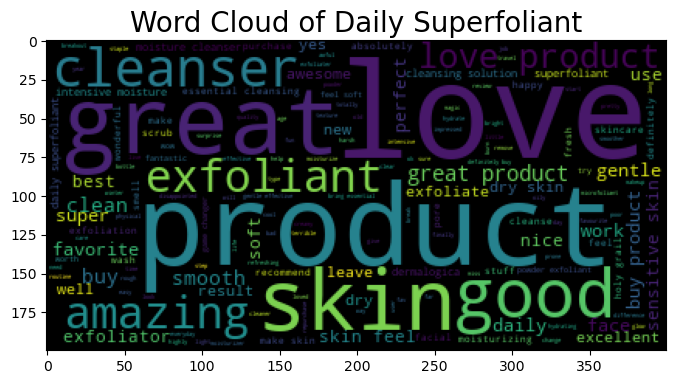

In [18]:
from wordcloud import WordCloud

# plot word cloud
plt.figure(figsize=(8, 8))
wordcld = WordCloud().generate(text=reviews_to_string(super_))
plt.imshow(wordcld)
plt.title("Word Cloud of Daily Superfoliant", fontsize=20)

Text(0.5, 1.0, 'Word Cloud of Daily Microfoliant')

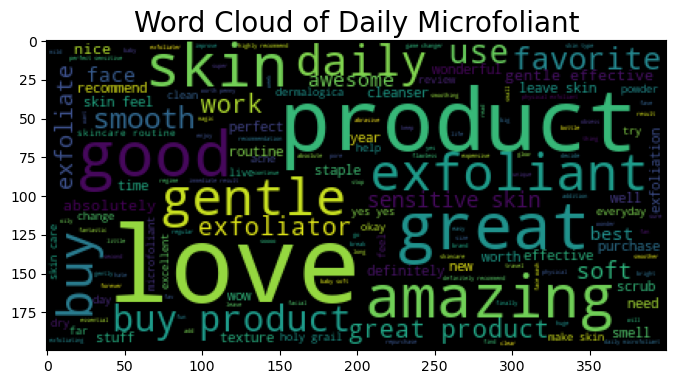

In [19]:
# plot word cloud

plt.figure(figsize=(8, 8))
wordcld = WordCloud().generate(text=reviews_to_string(micro_))
plt.imshow(wordcld)
plt.title("Word Cloud of Daily Microfoliant", fontsize=20)

Text(0.5, 1.0, 'Word Cloud of Hydro Masque Exfoliant')

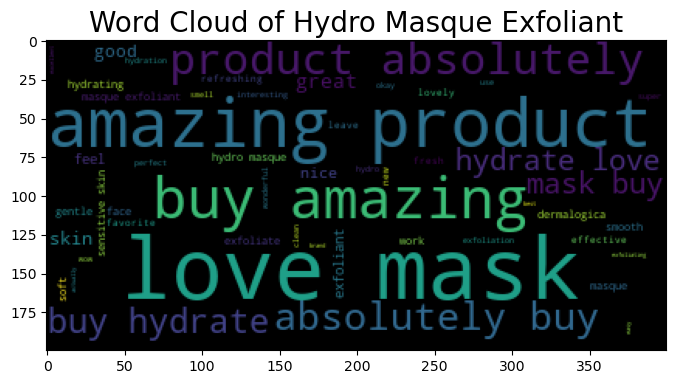

In [20]:
# plot word cloud

plt.figure(figsize=(8, 8))
wordcld = WordCloud().generate(text=reviews_to_string(ex_))
plt.imshow(wordcld)
plt.title("Word Cloud of Hydro Masque Exfoliant", fontsize=20)

Text(0.5, 1.0, 'Word Cloud of Multi-Vitamin Thermafoliant')

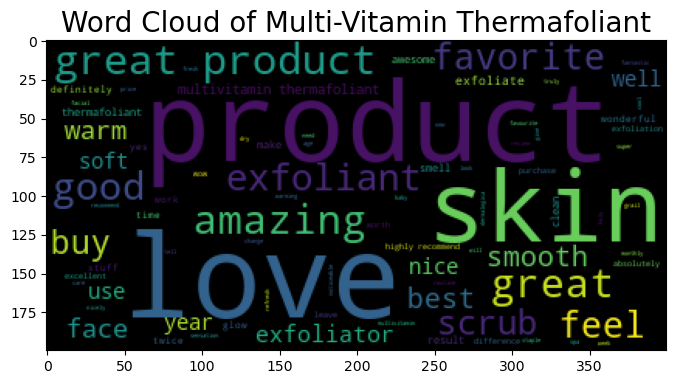

In [21]:
# plot word cloud

plt.figure(figsize=(8, 8))
wordcld = WordCloud().generate(text=reviews_to_string(therma_))
plt.imshow(wordcld)
plt.title("Word Cloud of Multi-Vitamin Thermafoliant", fontsize=20)

### Qs 3. Perform sentiment analysis. Build a ML model that can predict whether a review is positive or negative.

In [22]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load("en_core_web_sm")


def sentiment(text):
    STB = SpacyTextBlob(nlp)
    doc = nlp(text)
    polarity = STB.get_polarity(doc)
    return polarity

In [23]:
skincare_data["Review_Polarity"] = skincare_data["Review_Text"].apply(
    lambda x: sentiment(x)
)

In [24]:
def clean_text(text):
    doc = nlp(text)
    tokens = [
        token.lemma_.strip().lower()
        for token in doc
        if not token.is_stop and not token.is_punct
    ]
    return " ".join(tokens)

In [25]:
skincare_data["New_Review_Text"] = skincare_data["Review_Text"].apply(
    lambda x: clean_text(x)
)

In [26]:
skincare_data["Review_Sentiment"] = skincare_data["New_Review_Text"].apply(
    lambda x: 1 if sentiment(x) >= 0 else 0
)

In [27]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Review_Sentiment"
X = skincare_data["New_Review_Text"]
y = skincare_data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((3317,), (830,))

### Multinomial Naive Bayes

In [28]:
# Preprocess the text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


# Instantiate vectorizer
vectorizer = CountVectorizer()

# Apply
X_trn = vectorizer.fit_transform(X_train)
X_tst = vectorizer.transform(X_test)
print(f"Shape X_train: {X_trn.shape}")

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_trn, y_train)

# Accuracy
train_accuracy = nb_model.score(X_trn, y_train)
test_accuracy = nb_model.score(X_tst, y_test)

percent_accuracy_train = train_accuracy * 100
percent_accuracy_test = test_accuracy * 100

print(f"Train accuracy: {percent_accuracy_train:.1f}%")
print(f"Test accuracy: {percent_accuracy_test:.1f}%")

Shape X_train: (3317, 3576)
Train accuracy: 95.0%
Test accuracy: 95.9%


### TFIDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TFIDF vectorizer
tfidf_vec = TfidfVectorizer()
trn_data = tfidf_vec.fit_transform(skincare_data["New_Review_Text"])
trn_data

<4147x3920 sparse matrix of type '<class 'numpy.float64'>'
	with 71948 stored elements in Compressed Sparse Row format>

In [30]:
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Review_Sentiment"
X = skincare_data["New_Review_Text"]
y = skincare_data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    trn_data, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((3317, 3920), (830, 3920))

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score


# Initialize
logit = LogisticRegression(random_state=RANDOM_STATE)  # max_iter=180)

# Fit
logit.fit(X_train, y_train)

# Predict
y_pred = logit.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy_test * 100, "%")

Accuracy: 95.42168674698796 %
